In [8]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.3 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt

In [22]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1) # to add some noise to the data
y_clean = 4 + 3 * X

In [23]:
y.shape

(1000, 1)

In [24]:
y.squeeze().shape

(1000,)

In [25]:
GD_model = SGDRegressor(max_iter=1000, eta0=0.001)
GD_model.fit(X, y)

/home/malikaalnaabi/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [12]:
y_hat = GD_model.predict(X)

In [13]:
GD_model.intercept_, GD_model.coef_

(array([3.54126706]), array([3.39903315]))

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y, y_hat)

1.0985343439709123

In [16]:
GD_model.n_iter_no_change

5

In [17]:
X_b = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)

In [26]:
def model_ex(max_iter=0, lr=0, line_style=None):
    _model = SGDRegressor(max_iter=max_iter, eta0=lr)
    _model_fit = _model.fit(X, y)
    _y_hat = _model_fit.predict(X)
    mse = mean_squared_error(y_clean, _y_hat)
    print(f"MSE: {mse}")
    _y_hat_b = _model_fit.predict(X_b)
    line_style["label"] += f" - MSE={mse:0.4f}"
    plt.plot(X_b, _y_hat_b, **line_style)
    

MSE: 0.002860310721408579
MSE: 0.006338855280858576
MSE: 0.007461017808738914
MSE: 0.014404660932721943
MSE: 0.04881492417412898


/home/malikaalnaabi/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malikaalnaabi/.local/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/malikaalnaabi/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/malikaalnaabi/.local/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider i

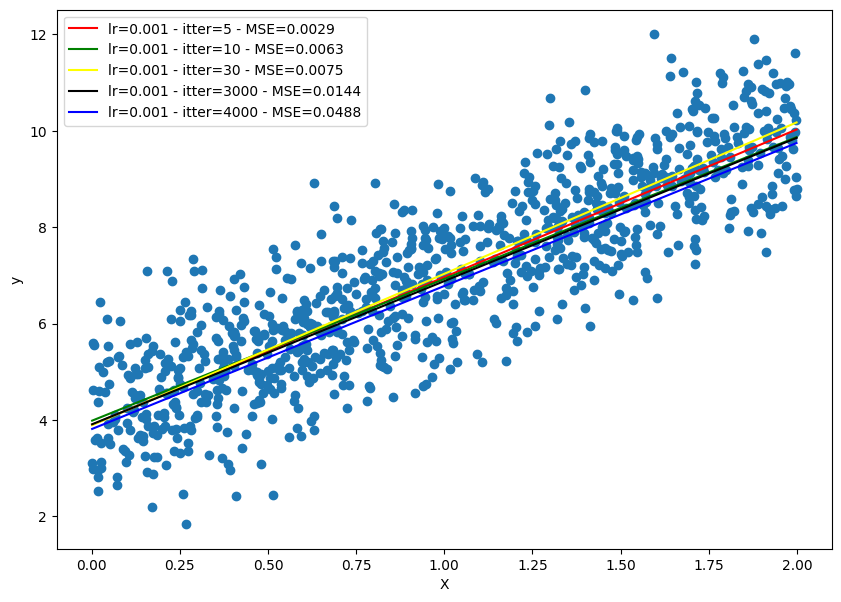

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X")
# # plt.plot(X_b, y_hat_b)
model_ex(10, 0.1, {"color":"red", "label":"lr=0.001 - itter=5"})
model_ex(10, 0.2, {"color":"green", "label":"lr=0.001 - itter=10"})
model_ex(10, 0.3, {"color":"yellow", "label":"lr=0.001 - itter=30"})
model_ex(10, 0.4, {"color":"black", "label":"lr=0.001 - itter=3000"})
model_ex(10, 0.5, {"color":"blue", "label":"lr=0.001 - itter=4000"})
plt.legend()